<a href="https://colab.research.google.com/github/Guneeth-Kakani/FMML_Project_and_Labs/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

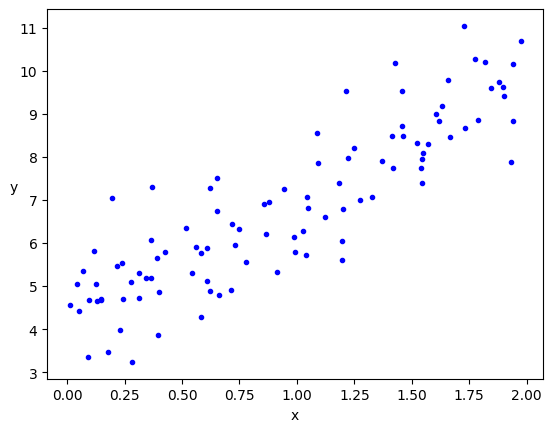

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

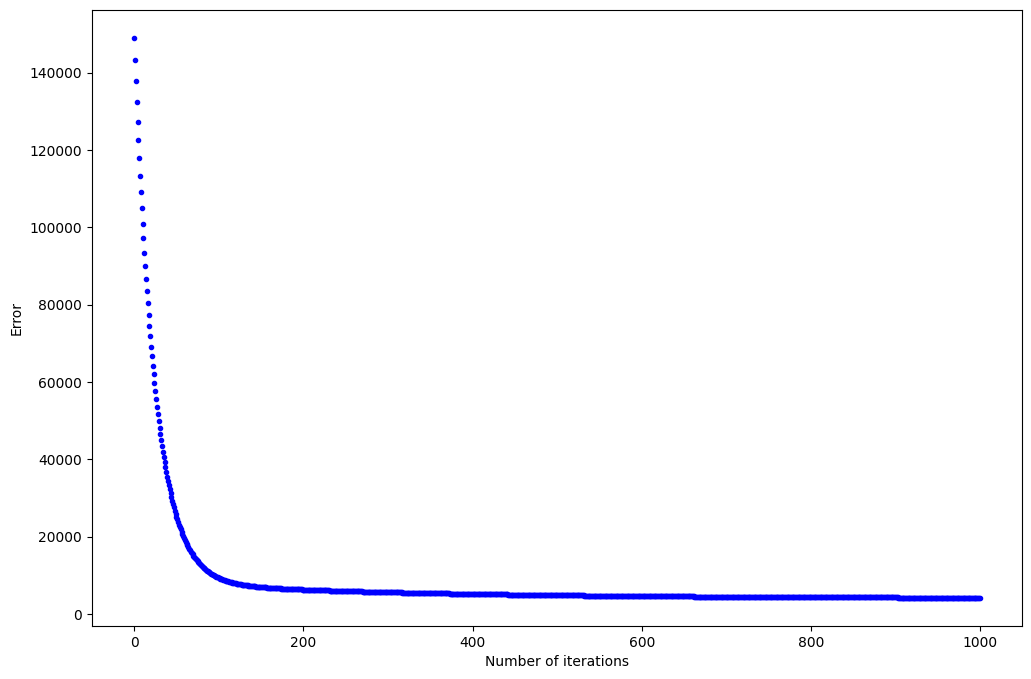

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

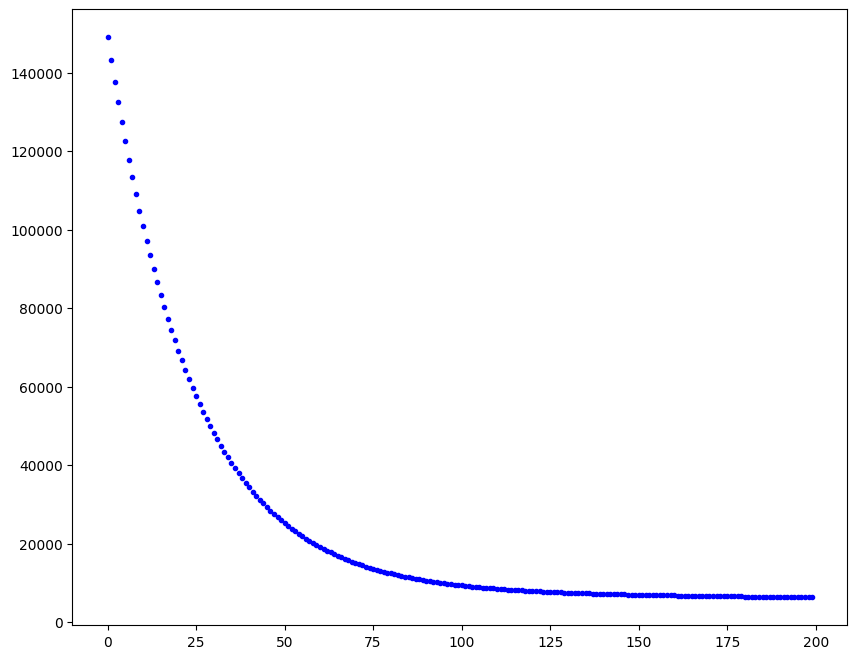

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


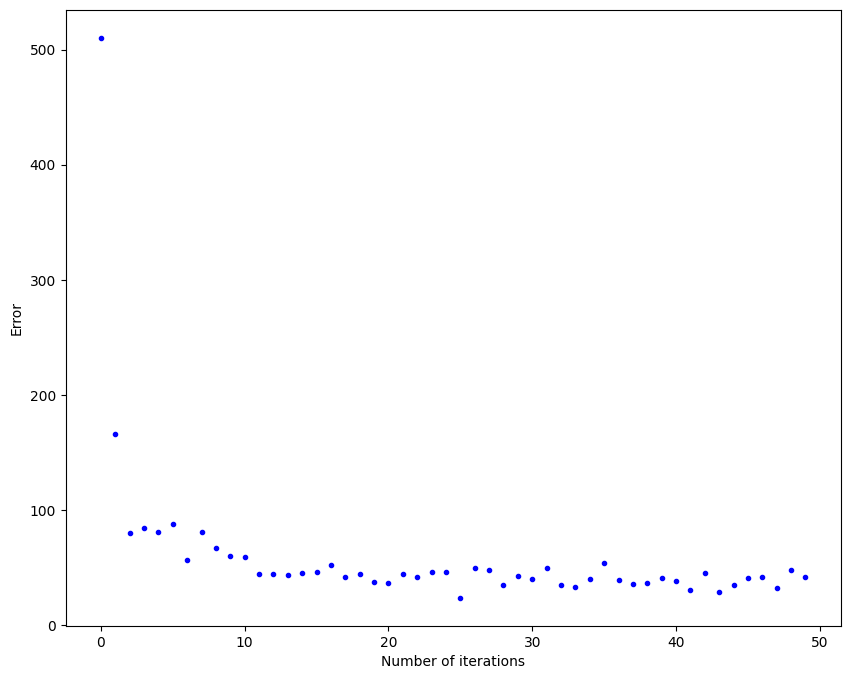

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


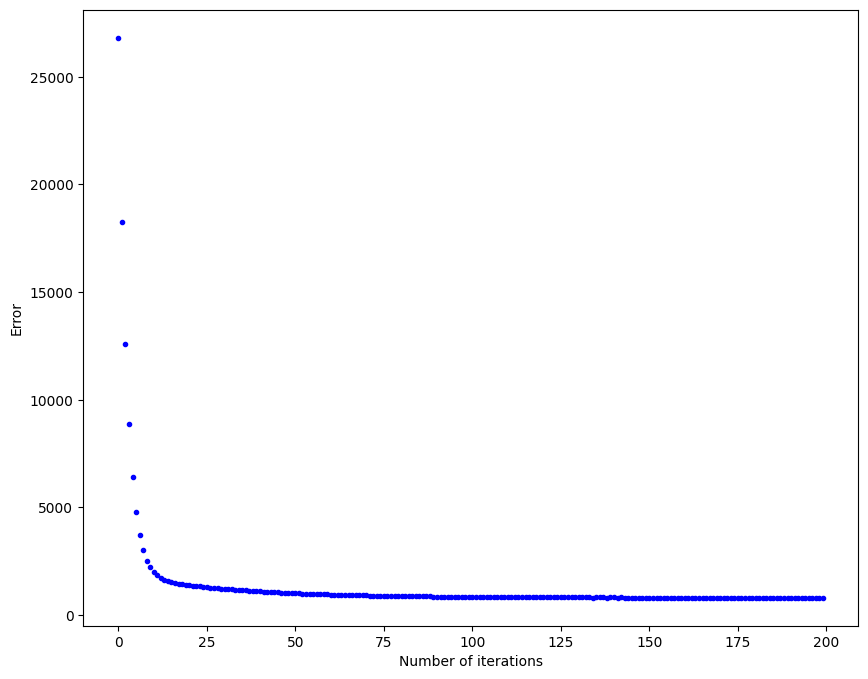

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1,1)  # reshape for matrix operations

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
X = np.c_[np.ones((X.shape[0], 1)), X]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    m = len(y)
    return -1/m * np.sum(y*np.log(y_hat+1e-8) + (1-y)*np.log(1-y_hat+1e-8))


In [4]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for _ in range(epochs):
        y_hat = sigmoid(X @ theta)
        gradient = X.T @ (y_hat - y) / m
        theta -= lr * gradient
        losses.append(compute_loss(y, y_hat))
    return theta, losses

def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for _ in range(epochs):
        for i in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            y_hat = sigmoid(xi @ theta)
            gradient = xi.T @ (y_hat - yi)
            theta -= lr * gradient
        losses.append(compute_loss(y, sigmoid(X @ theta)))
    return theta, losses

def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []
    for _ in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            y_hat = sigmoid(xi @ theta)
            gradient = xi.T @ (y_hat - yi) / len(xi)
            theta -= lr * gradient
        losses.append(compute_loss(y, sigmoid(X @ theta)))
    return theta, losses


In [5]:
# Run Batch GD
theta_bgd, loss_bgd = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=300)

# Run SGD
theta_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=300)

# Run Mini-batch GD with batch_size=32
theta_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=300, batch_size=32)


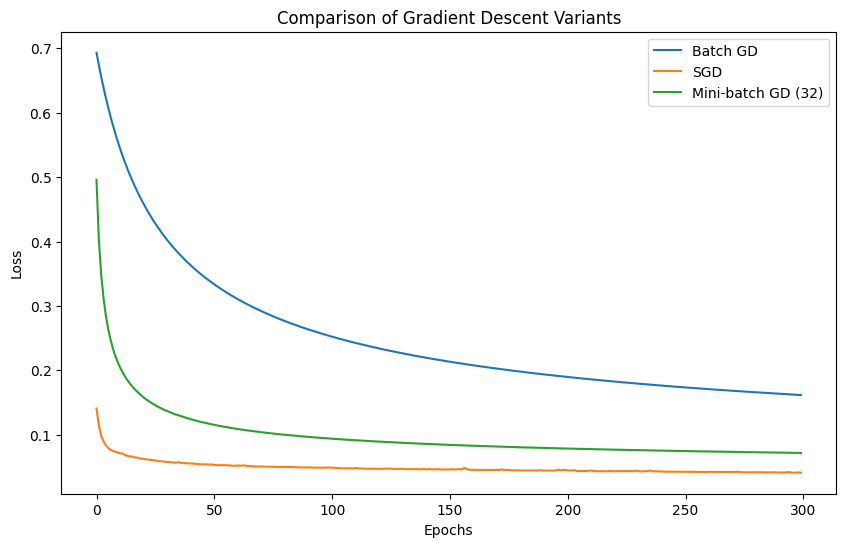

In [6]:
plt.figure(figsize=(10,6))
plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_mbgd, label="Mini-batch GD (32)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparison of Gradient Descent Variants")
plt.show()


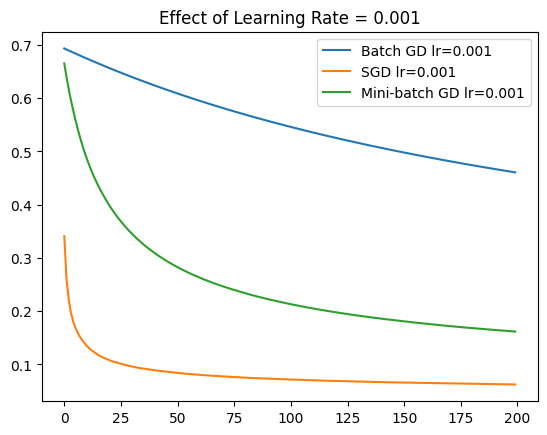

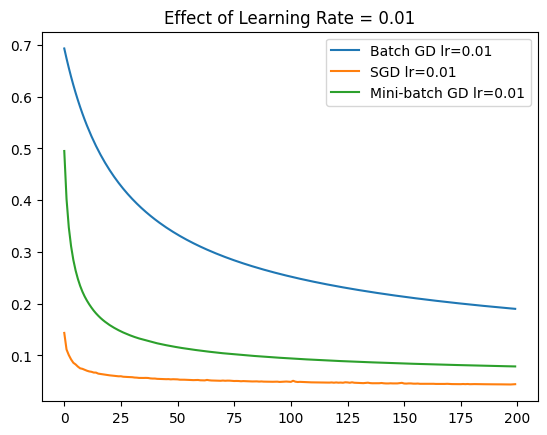

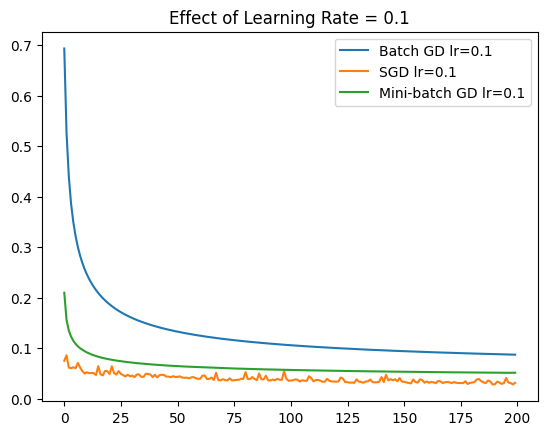

In [7]:
# Different learning rates
for lr in [0.001, 0.01, 0.1]:
    _, loss_bgd = batch_gradient_descent(X_train, y_train, lr=lr, epochs=200)
    _, loss_sgd = stochastic_gradient_descent(X_train, y_train, lr=lr, epochs=200)
    _, loss_mbgd = mini_batch_gradient_descent(X_train, y_train, lr=lr, epochs=200, batch_size=32)

    plt.plot(loss_bgd, label=f"Batch GD lr={lr}")
    plt.plot(loss_sgd, label=f"SGD lr={lr}")
    plt.plot(loss_mbgd, label=f"Mini-batch GD lr={lr}")
    plt.legend()
    plt.title(f"Effect of Learning Rate = {lr}")
    plt.show()


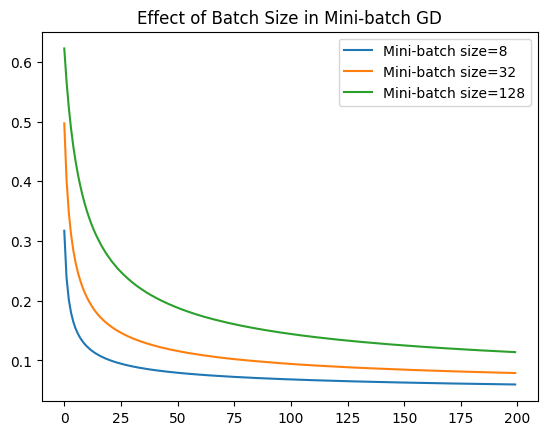

In [8]:
# Different batch sizes in Mini-batch GD
for batch in [8, 32, 128]:
    _, loss_mbgd = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=200, batch_size=batch)
    plt.plot(loss_mbgd, label=f"Mini-batch size={batch}")

plt.legend()
plt.title("Effect of Batch Size in Mini-batch GD")
plt.show()


In [9]:
def predict(X, theta):
    y_prob = sigmoid(X @ theta)
    return (y_prob >= 0.5).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Train models again with chosen parameters
theta_bgd, _ = batch_gradient_descent(X_train, y_train, lr=0.01, epochs=300)
theta_sgd, _ = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=300)
theta_mbgd, _ = mini_batch_gradient_descent(X_train, y_train, lr=0.01, epochs=300, batch_size=32)

# Predictions
y_pred_bgd = predict(X_test, theta_bgd)
y_pred_sgd = predict(X_test, theta_sgd)
y_pred_mbgd = predict(X_test, theta_mbgd)

# Accuracy scores
print("Batch GD Accuracy:", accuracy(y_test, y_pred_bgd))
print("SGD Accuracy:", accuracy(y_test, y_pred_sgd))
print("Mini-batch GD Accuracy:", accuracy(y_test, y_pred_mbgd))


Batch GD Accuracy: 0.9824561403508771
SGD Accuracy: 0.9824561403508771
Mini-batch GD Accuracy: 0.9824561403508771


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.